In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Load dataset
df = pd.read_csv("/content/medicinal_plants_100k_dataset.csv")

In [6]:
# Encode the crop labels
label_encoder = LabelEncoder()
df["Crop"] = label_encoder.fit_transform(df["Crop"])

# Split features and target variable
X = df.drop(columns=["Crop"])
y = df["Crop"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Deep Learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
551/551 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8251 - loss: 0.5195 - val_accuracy: 0.9656 - val_loss: 0.0891
Epoch 2/20
551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9593 - loss: 0.1079 - val_accuracy: 0.9748 - val_loss: 0.0631
Epoch 3/20
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9694 - loss: 0.0772 - val_accuracy: 0.9795 - val_loss: 0.0518
Epoch 4/20
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9754 - loss: 0.0646 - val_accuracy: 0.9823 - val_loss: 0.0438
Epoch 5/20
551/551 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9801 - loss: 0.0536 - val_accuracy: 0.9850 - val_loss: 0.0384
Epoch 6/20
551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9794 - loss: 0.0492 - val_accuracy: 0.9843 - val_loss: 0.0360
Epoch 7/20
551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9818 - loss: 0.0442 - val_accuracy: 0.9873 - val_loss: 0.0313
Epoch 8/20
551/551 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9823 - loss: 0.0422 - val_accuracy: 0.

In [13]:
# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.85%


In [14]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


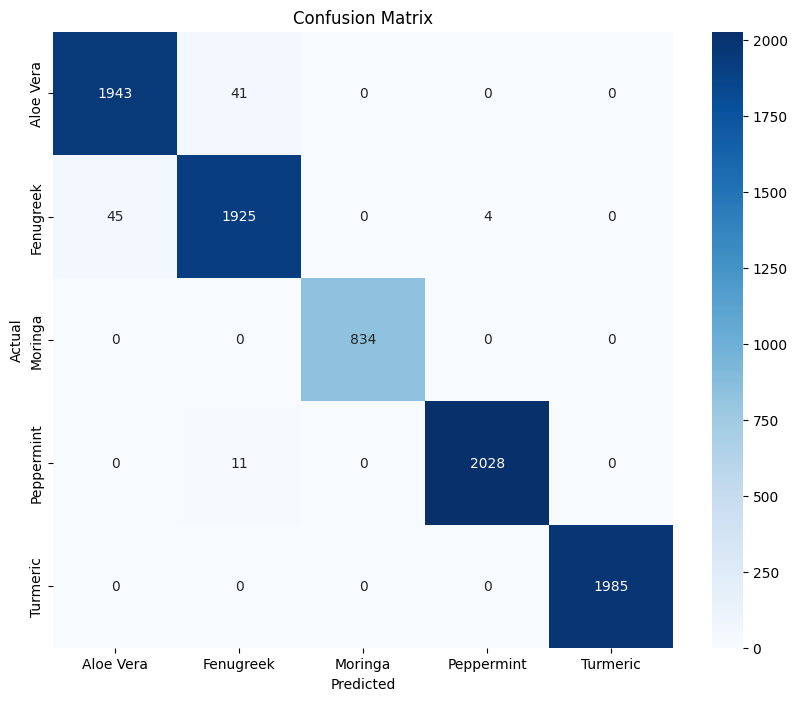

              precision    recall  f1-score   support

   Aloe Vera       0.98      0.98      0.98      1984
   Fenugreek       0.97      0.98      0.97      1974
     Moringa       1.00      1.00      1.00       834
  Peppermint       1.00      0.99      1.00      2039
    Turmeric       1.00      1.00      1.00      1985

    accuracy                           0.99      8816
   macro avg       0.99      0.99      0.99      8816
weighted avg       0.99      0.99      0.99      8816



In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

In [16]:
model.save("/content/deep_learning_medicinal_plants_model.h5")

In [17]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/deep_learning_medicinal_plants_model.h5")

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

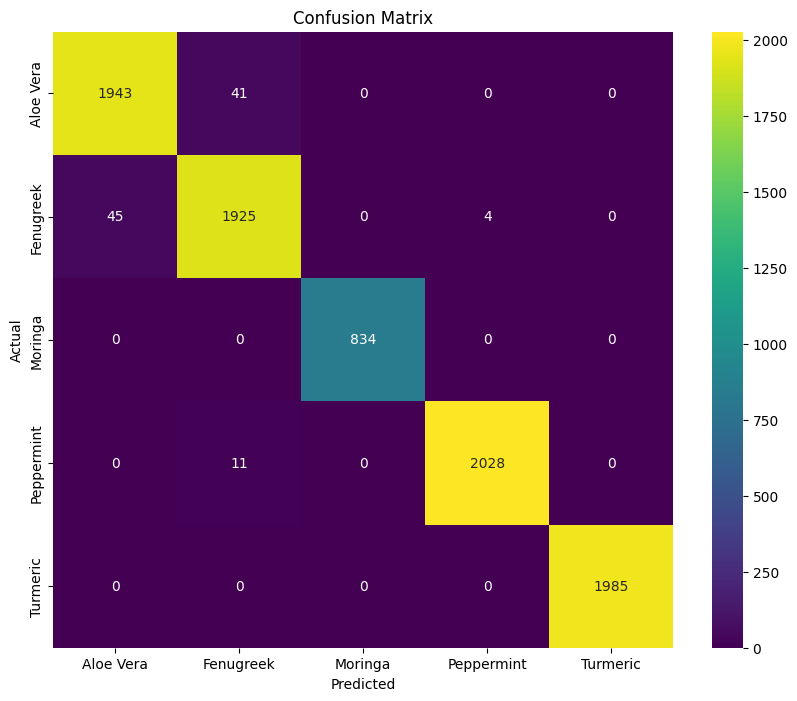

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()


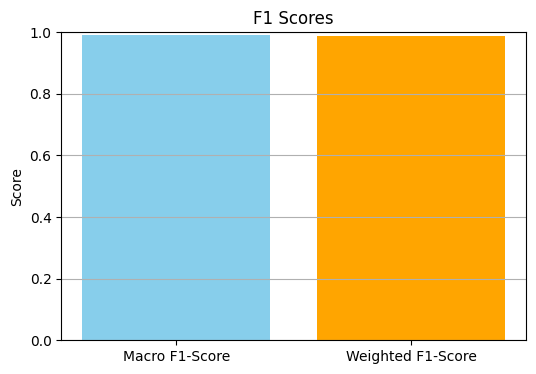

In [20]:
# Plot F1-Scores (Macro & Weighted)
f1_macro = report['macro avg']['f1-score']
f1_weighted = report['weighted avg']['f1-score']

plt.figure(figsize=(6, 4))
plt.bar(['Macro F1-Score', 'Weighted F1-Score'], [f1_macro, f1_weighted], color=['skyblue', 'orange'])
plt.title('F1 Scores')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

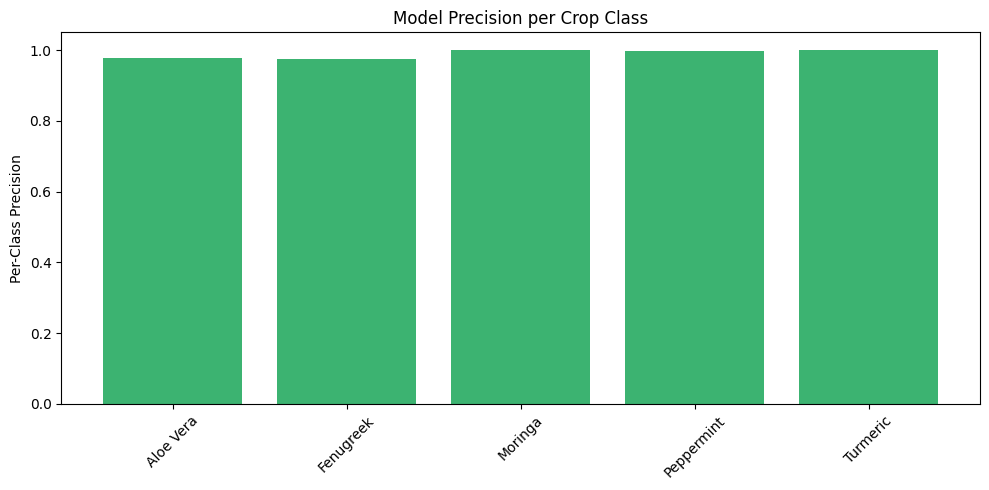

In [21]:
# Plot Per-Class Accuracy
per_class_acc = [report[label]['precision'] for label in label_encoder.classes_ if label in report]
plt.figure(figsize=(10, 5))
plt.bar(label_encoder.classes_, per_class_acc, color='mediumseagreen')
plt.xticks(rotation=45)
plt.ylabel("Per-Class Precision")
plt.title("Model Precision per Crop Class")
plt.tight_layout()
plt.show()

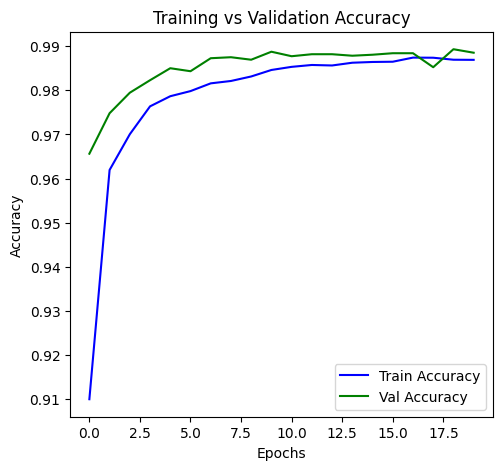

In [22]:
# Training History Visualization
plt.figure(figsize=(12, 5))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

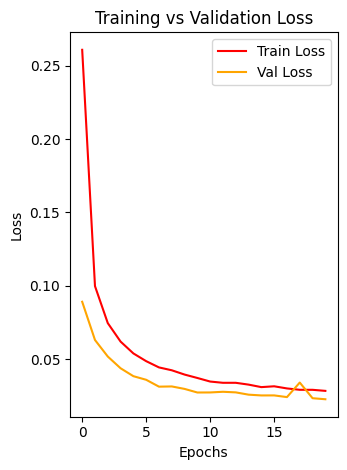

In [23]:
# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()